# Predicting Car Price

This project is about predicting car price amoung various models with various features . We are trying to understand the data and the complexties it has and then we are choosing a perfect model to fit the data and predict the car price.This can be very useful for customers to know the price of the car they wish to buy.

In [158]:
##import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

We import the necessay python packages to work on

In [159]:
#Reading the data from the file
file=pd.read_csv('data.csv')

In [160]:
#To have a look at the data
file.head() 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [161]:
#understanding the data better
file.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [162]:
file.shape

(11914, 16)

We can see the count has differnt values amoung the columns ,this means certain values are missing in those columns we can either choose to fill 0 or remove that entry. Since we have ample ample amount of entries I choose to ignore those entries

In [163]:
#to delete the incomplete entries
file=file.dropna()
file.shape

(8084, 16)

In [164]:
file.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Next we must try to get the relationship of features on the MSRP (price), so lets see the correlation of the data to get a better understanding on the dependencies.

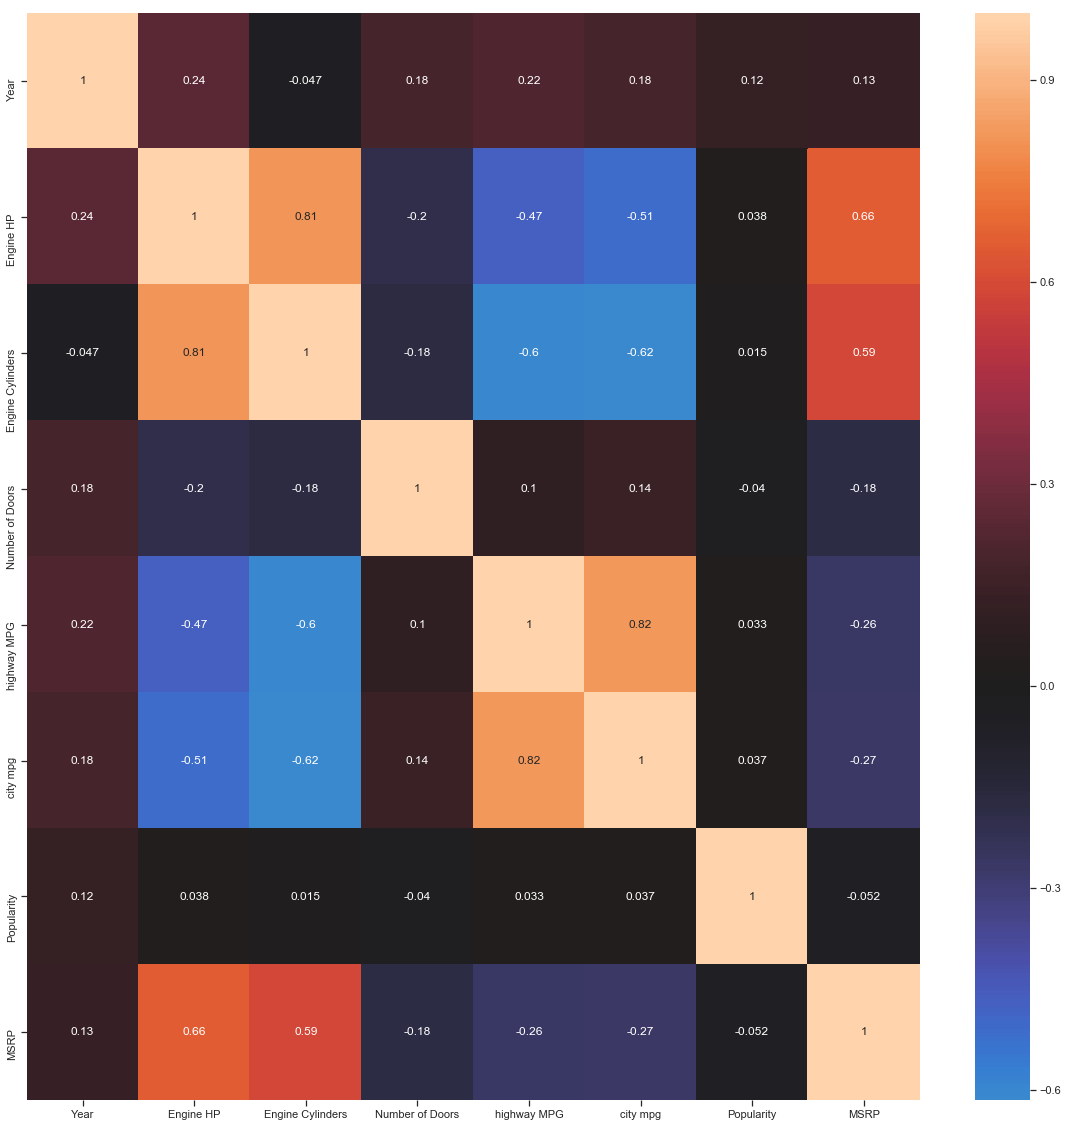

In [165]:
corr=file.corr()
fig=plt.figure(figsize=(20,20))
ax=sns.heatmap(corr,annot=True,center=0)

We can see the 'Popularity' feature doesnt not impact the price that much we can actually ignore that feature where as the 'year','city mileage','highway mileage','Engine cylinder no'and 'HP' actually makes an impact on the price. So we'll check out the dependencies in depth.

D:\Program Files\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Program Files\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Program Files\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Program Files\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<Figure size 2160x2160 with 0 Axes>

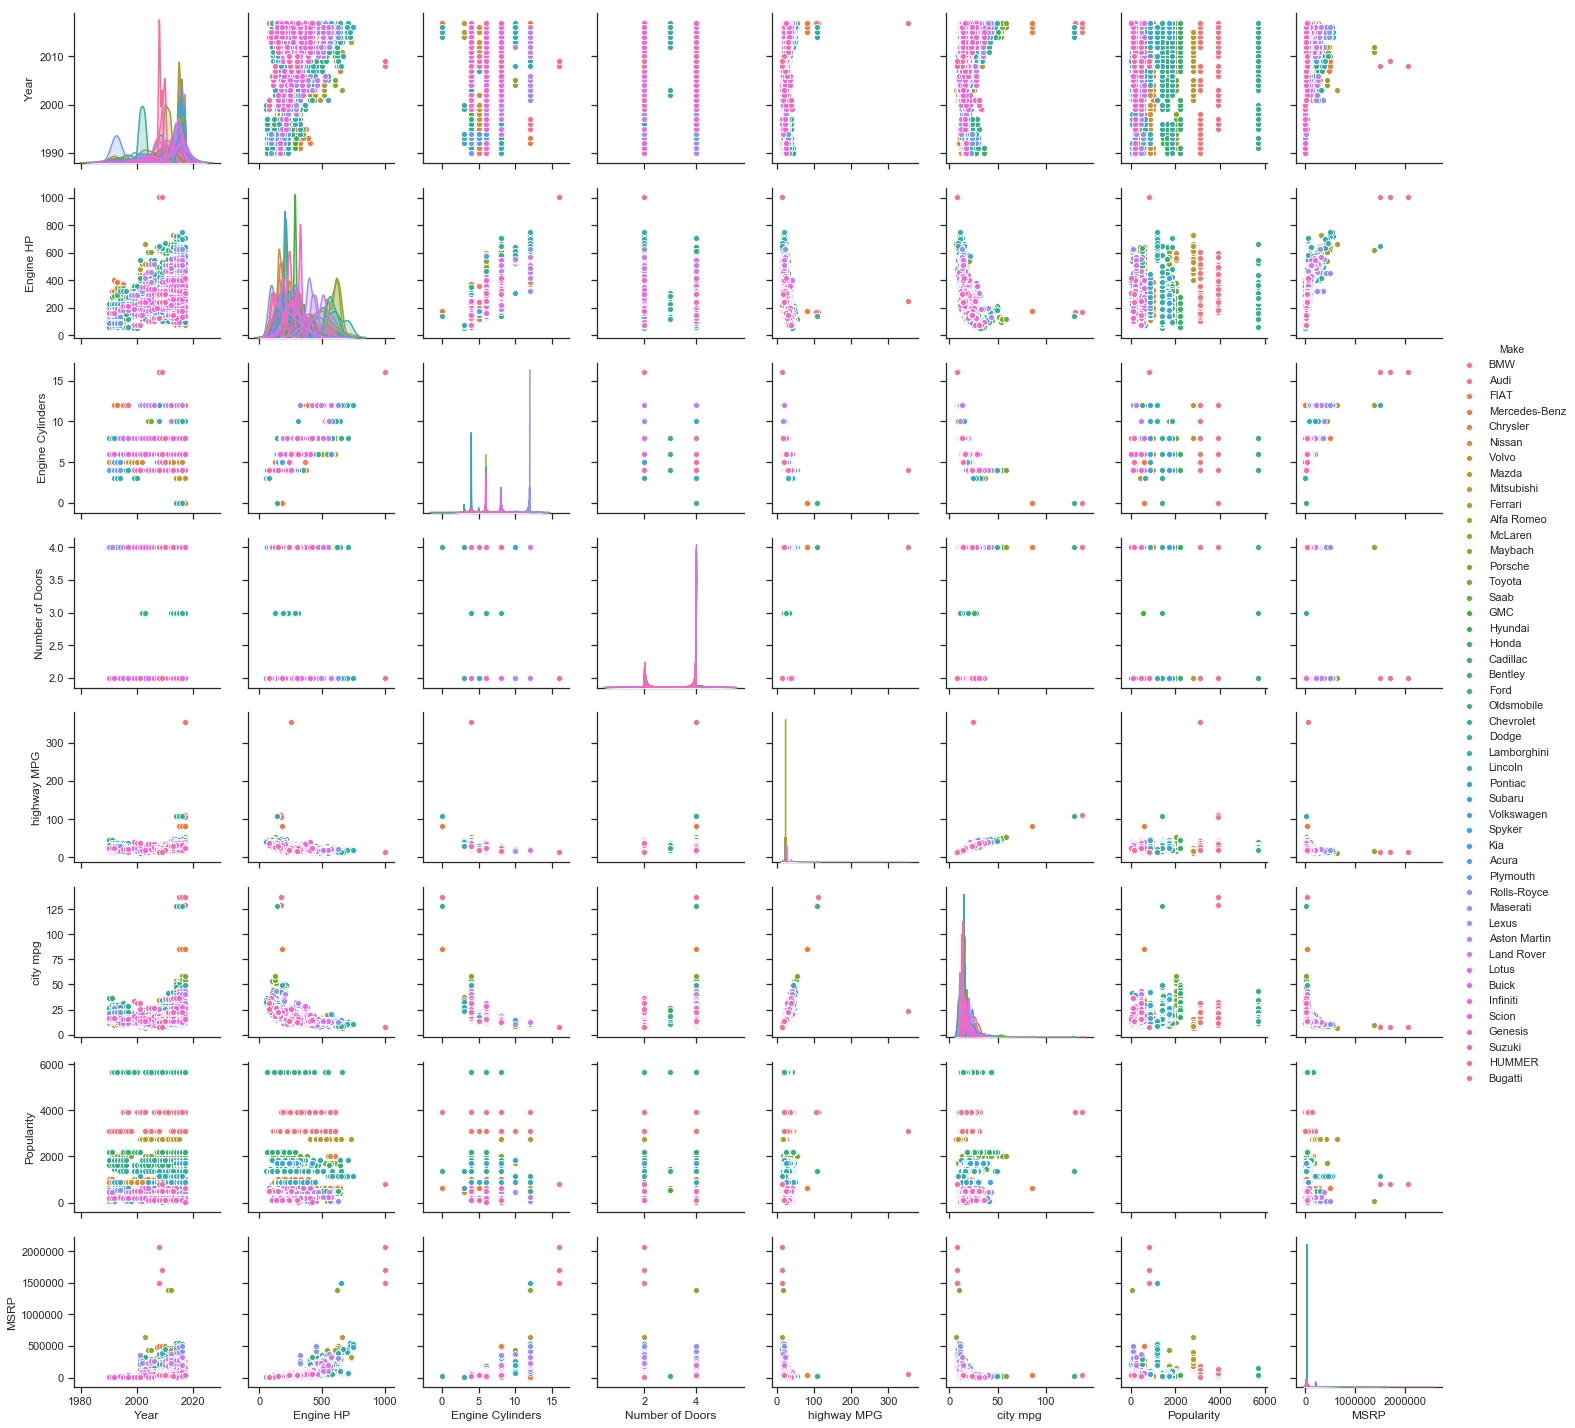

In [166]:
sns.set(style="ticks")
fig=plt.figure(figsize=(30,30))
sns.pairplot(file,hue='Make')

From the above graph we can see that the features('city mileage','highway mileage','Engine cylinder no'and 'HP') has some non linear relationship so we can try transforming the feature into any of the functions like log,cube and square and check which has more dependency. According to that we can choose the feature. Below we create a temporary dataframe to have all the transformed columns so that it will be easy to relate and check.

In [167]:
#Create a dataframe
check=pd.DataFrame()

In [168]:
#Copying the data from file to dataframe and transform the feature
check['MSRP']=file['MSRP']
check['Log MSRP']=np.log(1+file['MSRP'])
check['Sq MSRP']=np.square(file['MSRP'])
check['cube MSRP']=np.power(file['MSRP'],3)

check['Engine HP']=file['Engine HP']
check['Log Engine HP']=np.log(1+file['Engine HP'])
check['Sq Engine HP']=np.square(file['Engine HP'])
check['cube Engine HP']=np.power(file['Engine HP'],3)

check['highway MPG']=file['highway MPG']
check['Log highway MPG']=np.log(1+file['highway MPG'])
check['Sq highway MPG']=np.square(file['highway MPG'])
check['cube highway MPG']=np.power(file['highway MPG'],3)


In [169]:
check['city mpg']=file['city mpg']
check['Log city mpg']=np.log(1+file['city mpg'])
check['Sq city mpg']=np.square(file['city mpg'])
check['cube city mpg']=np.power(file['city mpg'],3)

In [170]:
check.columns

Index(['MSRP', 'Log MSRP', 'Sq MSRP', 'cube MSRP', 'Engine HP',
       'Log Engine HP', 'Sq Engine HP', 'cube Engine HP', 'highway MPG',
       'Log highway MPG', 'Sq highway MPG', 'cube highway MPG', 'city mpg',
       'Log city mpg', 'Sq city mpg', 'cube city mpg'],
      dtype='object')

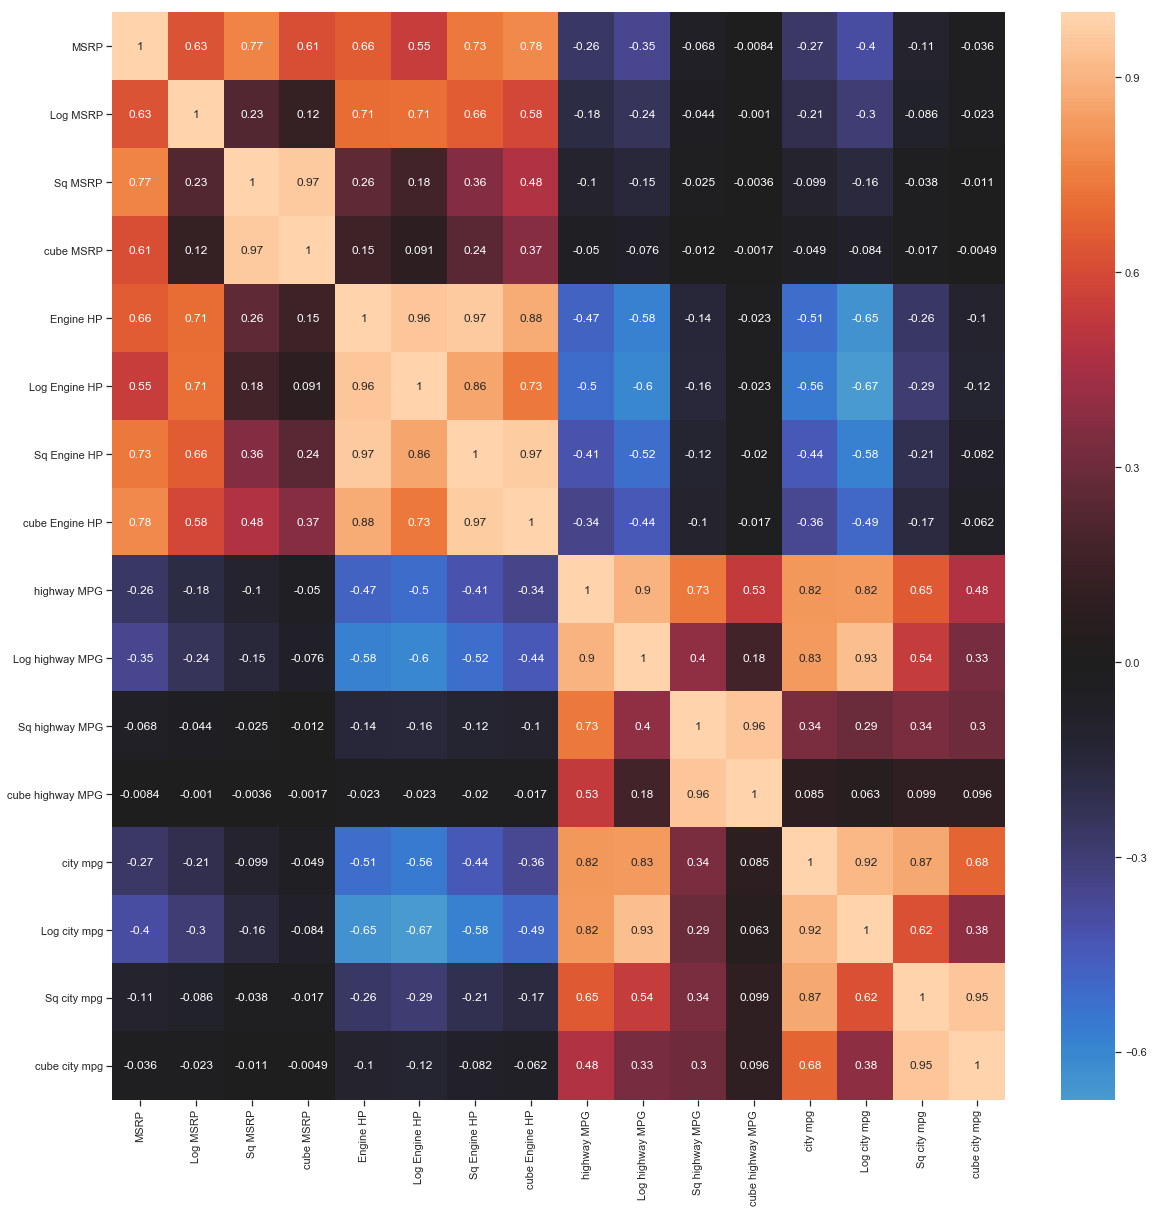

In [171]:
corr=check.corr()
fig=plt.figure(figsize=(20,20))
ax=sns.heatmap(corr,annot=True,center=0)

We see that these features has more correlation values than the original features cube engine HP, log hw mpg, log city mpg so we can make these the features for our model and get rid of the original features.

In [172]:
file.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [173]:
#making the transforms in the data
file['cube Engine HP']=np.power(file['Engine HP'],3)
file['Log highway MPG']=np.log(1+file['highway MPG'])
file['Log city mpg']=np.log(1+file['city mpg'])


Once the features are transformed we can remove the following features. Popularity has very less dependencies so we can remove that along with the other features.We use 'drop' to do the following

In [174]:
#we can remove the unwanted columns
file=file.drop(columns=['Engine HP','highway MPG','city mpg','Popularity'])

In [175]:
#Setting the label and features from the data
Y1=file['MSRP']
Y=np.ravel(Y1)#ravel is to convert into proper 1D series
X=file

Our label is the MSRP(price) so we set that to Y, after converting into a proper series. When we set the features we must be aware that other columns are in numerical type. To get the best performance from the model we make the numerical columns alone into categorical columns using the function 'get_dummies'.

In [176]:
#to convert the numerical columns into categorical columns
X=pd.get_dummies(X, dummy_na = False, columns=['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'] )
X.head()

,Year,Engine Cylinders,Number of Doors,MSRP,cube Engine HP,Log highway MPG,Log city mpg,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,6.0,2.0,46135,37595375.0,3.295837,2.995732,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,6.0,2.0,40650,27000000.0,3.367296,2.995732,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,6.0,2.0,36350,27000000.0,3.367296,3.044522,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,6.0,2.0,29450,12167000.0,3.367296,2.944439,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,6.0,2.0,34500,12167000.0,3.367296,2.944439,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [177]:
#splitting the data into test set and train set
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=32)

We choose random forest regressor as the model as we have more categorical values to deal with , the number of estimators chosen is 1000 ,with less estimator the model's efficiency was low so we go with 1000.

In [183]:
clf=RandomForestRegressor(n_estimators=1000)
clf.fit(X_train,Y_train) #fitting the data 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [179]:
#trying on the test data
y_pred=clf.predict(X_test)

In [180]:
#calculating the error 
error=(sum(abs(y_pred-y_test)))
error

32767.945999999938

In [181]:
#last 10 values in the test data
y_pred[:10] 

array([  2000.   ,  72336.65 ,  55613.445,  33926.915,  40640.455,
        46533.15 ,  89373.436,  53193.135,  82628.755, 500983.34 ])

In [182]:
#last 10 values in the predicted data to manually check 
y_test[:10]

array([  2000,  72300,  55600,  33930,  40615,  46530,  89350,  53170,
        82645, 490700], dtype=int64)

In [ ]:
error/len(y_test)

We can see the model does a pretty good job , the price ranges are almost close. This is because of the number of estimators and feature engineering.We can try with different numbers also.